In [35]:
cities = [
    {"city": "Amaravati", "lat": 16.5062, "lon": 80.6480},
    {"city": "Itanagar", "lat": 27.0844, "lon": 93.6053},
    {"city": "Dispur", "lat": 26.1357, "lon": 91.8000},
    {"city": "Patna", "lat": 25.5941, "lon": 85.1376},
    {"city": "Raipur", "lat": 21.2514, "lon": 81.6296},
    {"city": "Panaji", "lat": 15.4909, "lon": 73.8278},
    {"city": "Gandhinagar", "lat": 23.2230, "lon": 72.6500},
    {"city": "Chandigarh", "lat": 30.7333, "lon": 76.7794},
    {"city": "Shimla", "lat": 31.1048, "lon": 77.1734},
    {"city": "Ranchi", "lat": 23.3441, "lon": 85.3096},
    {"city": "Bengaluru", "lat": 12.9716, "lon": 77.5946},
    {"city": "Thiruvananthapuram", "lat": 8.5241, "lon": 76.9366},
    {"city": "Bhopal", "lat": 23.2599, "lon": 77.4126},
    {"city": "Mumbai", "lat": 19.0760, "lon": 72.8777},
    {"city": "Imphal", "lat": 24.8170, "lon": 93.9368},
    {"city": "Shillong", "lat": 25.5788, "lon": 91.8933},
    {"city": "Aizawl", "lat": 23.7271, "lon": 92.7176},
    {"city": "Kohima", "lat": 25.6751, "lon": 94.1086},
    {"city": "Bhubaneswar", "lat": 20.2961, "lon": 85.8245},
    {"city": "Jaipur", "lat": 26.9124, "lon": 75.7873},
    {"city": "Gangtok", "lat": 27.3389, "lon": 88.6065},
    {"city": "Chennai", "lat": 13.0827, "lon": 80.2707},
    {"city": "Hyderabad", "lat": 17.3850, "lon": 78.4867},
    {"city": "Agartala", "lat": 23.8315, "lon": 91.2868},
    {"city": "Lucknow", "lat": 26.8467, "lon": 80.9462},
    {"city": "Dehradun", "lat": 30.3165, "lon": 78.0322},
    {"city": "Kolkata", "lat": 22.5726, "lon": 88.3639},
    {"city": "Port Blair", "lat": 11.6234, "lon": 92.7265},
    {"city": "Daman", "lat": 20.3974, "lon": 72.8328},
    {"city": "New Delhi", "lat": 28.6139, "lon": 77.2090},
    {"city": "Srinagar", "lat": 34.0837, "lon": 74.7973},
    {"city": "Leh", "lat": 34.1526, "lon": 77.5770},
    {"city": "Kavaratti", "lat": 10.5667, "lon": 72.6420},
    {"city": "Puducherry", "lat": 11.9416, "lon": 79.8083}
]

In [36]:
API_KEY = "91b7bc67fd678fa1a3a391c5c51f10f9"

import requests
import pandas as pd

data = []

for c in cities:
    url = f"https://api.openweathermap.org/data/2.5/weather?lat={c['lat']}&lon={c['lon']}&appid={API_KEY}&units=metric"
    try:
        response = requests.get(url, timeout=10)
        res_json = response.json()
    except Exception as e:
        print(f"Request failed for {c['city']}: {e}")
        continue

    # Handle invalid API key or other HTTP errors
    if response.status_code == 401 or str(res_json.get("cod")) == "401":
        print("Invalid API key. Please check your API_KEY. Stopping further requests.")
        break
    if not response.ok:
        print(f"Failed to fetch data for {c['city']}: {res_json.get('message', response.status_code)}")
        continue

    main = res_json.get("main", {})
    wind = res_json.get("wind", {})
    weather = res_json.get("weather", [{}])

    # If 'main' data is missing, skip this city to avoid KeyError
    if "temp" not in main:
        print(f"No 'main' data for {c['city']}, skipping. Response: {res_json}")
        continue

    city_weather = {
        "city": c["city"],
        "temperature": main.get("temp"),
        "feels_like": main.get("feels_like"),
        "temp_min": main.get("temp_min"),
        "temp_max": main.get("temp_max"),
        "pressure": main.get("pressure"),
        "humidity": main.get("humidity"),
        "wind_speed": wind.get("speed"),
        "weather_description": weather[0].get("description") if isinstance(weather, list) and weather else None
    }

    data.append(city_weather)

df = pd.DataFrame(data)
df


,city,temperature,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,weather_description
0,Amaravati,24.95,25.67,24.95,24.95,1016,83,2.06,mist
1,Itanagar,19.75,19.09,19.75,19.75,1019,50,0.84,clear sky
2,Dispur,16.96,16.54,16.96,16.96,1018,70,0.87,clear sky
3,Patna,15.98,15.51,15.98,15.98,1019,72,2.06,mist
4,Raipur,17.07,17.13,17.07,17.07,1019,88,1.03,mist
5,Panaji,26.82,28.48,26.82,26.82,1014,69,3.09,mist
6,Gandhinagar,19.84,19.45,19.84,19.84,1016,60,3.60,haze
7,Chandigarh,12.74,11.48,12.74,12.74,1020,54,0.83,clear sky
8,Shimla,4.74,4.74,4.74,4.74,1022,66,0.00,haze
9,Ranchi,13.99,13.46,13.99,13.99,1020,77,0.00,mist


In [37]:
df.shape

(34, 9)

View first 5 rows

In [38]:
df.head()

,city,temperature,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,weather_description
0,Amaravati,24.95,25.67,24.95,24.95,1016,83,2.06,mist
1,Itanagar,19.75,19.09,19.75,19.75,1019,50,0.84,clear sky
2,Dispur,16.96,16.54,16.96,16.96,1018,70,0.87,clear sky
3,Patna,15.98,15.51,15.98,15.98,1019,72,2.06,mist
4,Raipur,17.07,17.13,17.07,17.07,1019,88,1.03,mist


Summary statistics

In [39]:
df.describe()

,temperature,feels_like,temp_min,temp_max,pressure,humidity,wind_speed
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,17.300882,17.235000,17.138235,17.325882,1018.264706,71.705882,1.889706
std,7.579212,8.607239,7.477174,7.593936,3.956650,17.058774,1.676673
min,-5.400000,-9.780000,-5.400000,-5.400000,1012.000000,27.000000,0.000000
25%,13.750000,12.807500,13.750000,13.750000,1016.000000,63.500000,0.832500
50%,17.015000,16.835000,16.955000,17.015000,1018.500000,71.000000,1.540000
75%,22.940000,23.147500,22.877500,22.940000,1020.000000,83.000000,3.020000
max,28.880000,32.470000,28.880000,28.880000,1031.000000,100.000000,7.600000


Check missing values

In [40]:
df.isnull().sum()

city                   0
temperature            0
feels_like             0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
weather_description    0
dtype: int64

In [41]:
df.dtypes

city                    object
temperature            float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed             float64
weather_description     object
dtype: object

Check number of unique weather descriptions

In [42]:
df["weather_description"].nunique()

6

Show unique weather types

In [43]:
df["weather_description"].unique()

array(['mist', 'clear sky', 'haze', 'fog', 'scattered clouds',
       'overcast clouds'], dtype=object)

This tells you how many different weather conditions India has right now:

- clear sky
- clouds
- haze
- smoke
- rain

Top 5 hottest cities

In [44]:
df.nlargest(5, "temperature")

,city,temperature,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,weather_description
27,Port Blair,28.88,32.47,28.88,28.88,1012,70,4.63,scattered clouds
21,Chennai,27.77,31.39,26.73,28.01,1015,79,3.09,mist
5,Panaji,26.82,28.48,26.82,26.82,1014,69,3.09,mist
32,Kavaratti,26.63,26.63,26.63,26.63,1013,82,3.24,overcast clouds
13,Mumbai,26.00,26.00,24.95,26.00,1014,73,1.54,mist


In [45]:
# This tells you how many different weather conditions India has right now: 
df.nsmallest(5, "temperature")

,city,temperature,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,weather_description
31,Leh,-5.40,-9.78,-5.40,-5.40,1031,33,2.81,clear sky
30,Srinagar,0.84,0.84,0.84,0.84,1029,27,0.83,clear sky
8,Shimla,4.74,4.74,4.74,4.74,1022,66,0.00,haze
29,New Delhi,11.07,10.50,11.07,11.07,1020,87,1.54,mist
24,Lucknow,12.05,11.92,12.05,12.05,1019,100,1.03,fog


In [46]:
df.nlargest(5, "humidity")

,city,temperature,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,weather_description
14,Imphal,13.96,14.02,13.96,13.96,1020,100,1.54,mist
23,Agartala,18.01,18.48,18.01,18.01,1017,100,0.00,fog
24,Lucknow,12.05,11.92,12.05,12.05,1019,100,1.03,fog
10,Bengaluru,18.89,19.21,16.95,19.50,1017,91,7.60,mist
4,Raipur,17.07,17.13,17.07,17.07,1019,88,1.03,mist


In [47]:
df.nsmallest(5, "humidity")

,city,temperature,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,weather_description
30,Srinagar,0.84,0.84,0.84,0.84,1029,27,0.83,clear sky
31,Leh,-5.40,-9.78,-5.40,-5.40,1031,33,2.81,clear sky
20,Gangtok,14.01,12.75,14.01,14.01,1021,49,0.57,clear sky
1,Itanagar,19.75,19.09,19.75,19.75,1019,50,0.84,clear sky
7,Chandigarh,12.74,11.48,12.74,12.74,1020,54,0.83,clear sky


In [48]:
df.nlargest(5, "wind_speed")

,city,temperature,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,weather_description
10,Bengaluru,18.89,19.21,16.95,19.50,1017,91,7.60,mist
33,Puducherry,25.74,26.48,25.74,25.74,1014,81,5.15,overcast clouds
27,Port Blair,28.88,32.47,28.88,28.88,1012,70,4.63,scattered clouds
6,Gandhinagar,19.84,19.45,19.84,19.84,1016,60,3.60,haze
28,Daman,23.51,23.67,23.51,23.51,1015,67,3.35,overcast clouds


In [49]:
float(df["temperature"].max() - df["temperature"].min())

#!/usr/bin/env python3

34.28

In [50]:
df.corr()


,temperature,feels_like,temp_min,temp_max,pressure,humidity,wind_speed
temperature,1.000000,0.994392,0.998141,0.999894,-0.950965,0.477282,0.381635
feels_like,0.994392,1.000000,0.991824,0.994597,-0.944968,0.489368,0.384075
temp_min,0.998141,0.991824,1.000000,0.997373,-0.952958,0.468753,0.355470
temp_max,0.999894,0.994597,0.997373,1.000000,-0.950690,0.479519,0.389871
pressure,-0.950965,-0.944968,-0.952958,-0.950690,1.000000,-0.569893,-0.323893
humidity,0.477282,0.489368,0.468753,0.479519,-0.569893,1.000000,0.115003
wind_speed,0.381635,0.384075,0.355470,0.389871,-0.323893,0.115003,1.000000


Weather Frequency Count

In [51]:
df["weather_description"].value_counts()

mist                13
clear sky           10
haze                 4
fog                  3
overcast clouds      3
scattered clouds     1
Name: weather_description, dtype: int64

It helps us understand the weather distribution across India.

# Outlier Detection (Temperature Z-Score)

In [52]:
mean_temp = df["temperature"].mean()
std_temp = df["temperature"].std()

df["temp_zscore"] = (df["temperature"] - mean_temp) / std_temp
df[abs(df["temp_zscore"]) > 2]

,city,temperature,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,weather_description,temp_zscore
30,Srinagar,0.84,0.84,0.84,0.84,1029,27,0.83,clear sky,-2.171846
31,Leh,-5.40,-9.78,-5.40,-5.40,1031,33,2.81,clear sky,-2.995151



**This identifies cities with unusually high or low temperatures compared to the overall distribution.  
A Z-score > 2 means the city temperature is very different from the average.**

In [53]:
df.loc[df["temperature"].idxmax(), ["city", "temperature", "temp_zscore"]]

city           Port Blair
temperature         28.88
temp_zscore      1.527747
Name: 27, dtype: object

displays three key details:

**This output shows which Indian capital recorded the highest temperature at the time of data collection.
It displays the city name, its temperature in Celsius, and the Z-score value.
The Z-score indicates how much the city’s temperature deviates from the average temperature of all capitals.
A higher Z-score means the city is significantly hotter compared to the national average.**


In [54]:
import matplotlib.pyplot as plt
import numpy as np


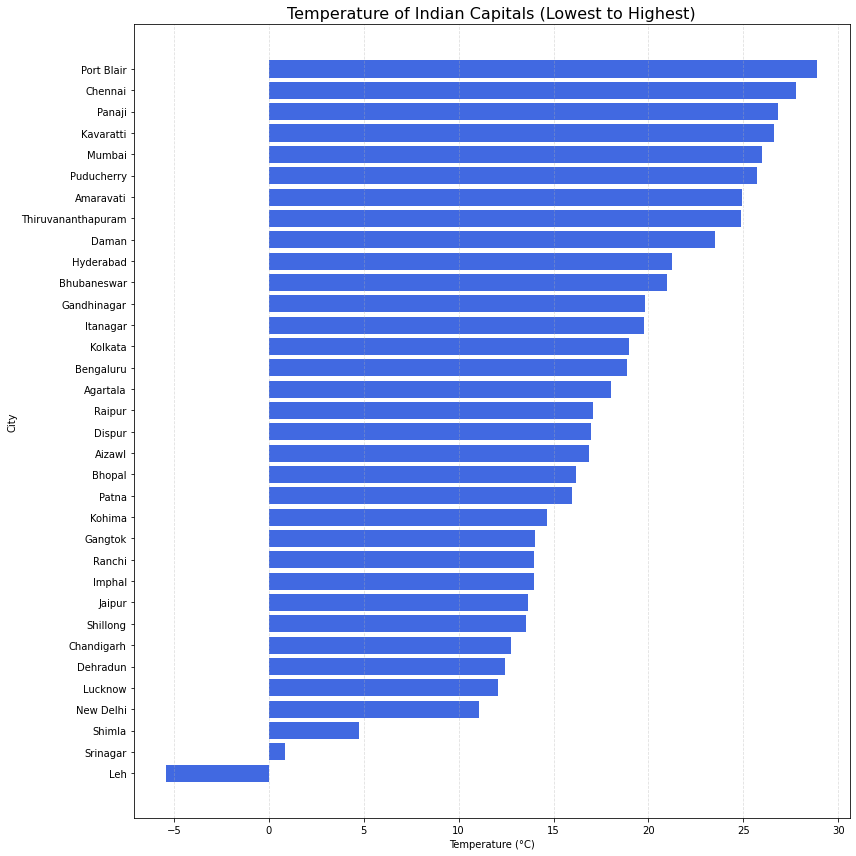

In [55]:
df_sorted = df.sort_values("temperature")

plt.figure(figsize=(12, 12))
plt.barh(df_sorted["city"], df_sorted["temperature"], color="royalblue")
plt.xlabel("Temperature (°C)")
plt.ylabel("City")
plt.title("Temperature of Indian Capitals (Lowest to Highest)", fontsize=16)
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

This chart shows the temperature variations across the state and union territory capitals of India, arranged from the lowest to the highest temperature. By sorting the data, the visual clearly highlights which regions are cooler and which are warmer at the current time. Cities such as Leh and Srinagar appear on the cooler end of the chart, reflecting their higher altitude and colder climate. On the warmer side, cities like Chennai, Port Blair, and Mumbai show higher temperatures, consistent with their coastal and tropical climates.  

The graph provides a clear comparison between the capitals and makes it easy to observe how temperature patterns differ across India’s diverse geographical regions. This visualization helps identify climatic trends, supports interpretation of regional weather differences, and gives a quick understanding of how temperature varies from north to south and from inland to coastal cities.

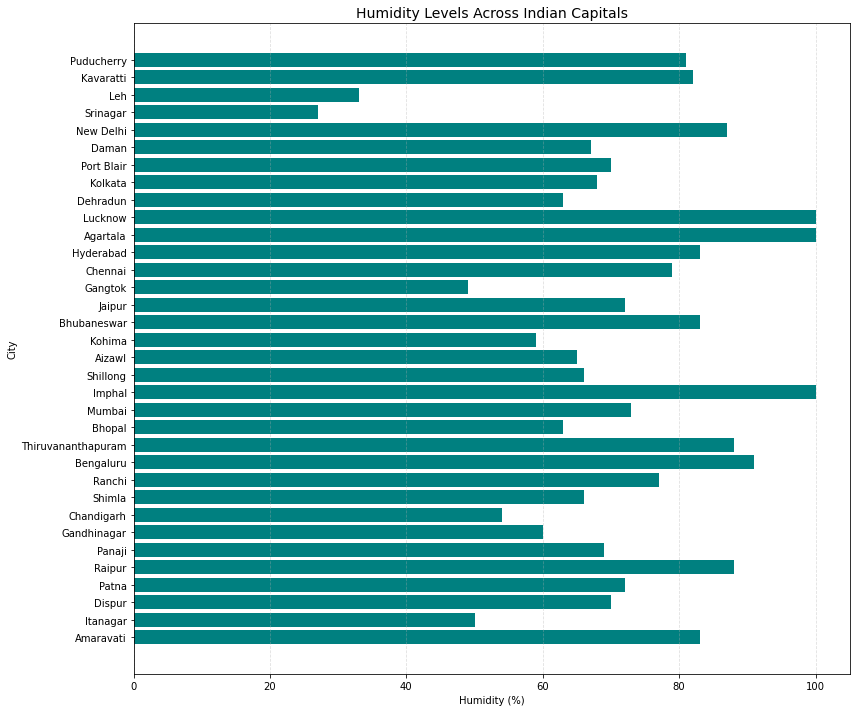

In [56]:
# Humidity Bar Chart
plt.figure(figsize=(12, 10))
plt.barh(df["city"], df["humidity"], color="teal")
plt.xlabel("Humidity (%)")
plt.ylabel("City")
plt.title("Humidity Levels Across Indian Capitals", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

This chart illustrates the humidity levels recorded across various state and union territory capitals of India. The bars show how moisture in the air differs from one region to another at the same point in time. Cities such as Puducherry, Kavaratti, and Port Blair display the highest humidity values, which is expected because these locations are coastal regions with warm and moist climates. In contrast, cities like Leh, Srinagar, and New Delhi show comparatively lower humidity levels due to their dry or colder environmental conditions.

The visualization provides a clear comparison between the different climatic zones in India. Coastal and tropical capitals tend to have consistently higher humidity, while northern and inland regions exhibit lower moisture levels. This plot highlights how geographical location, altitude, and proximity to the sea influence the humidity distribution across the country. Overall, the chart helps in understanding the distinct atmospheric conditions experienced by different Indian capitals.

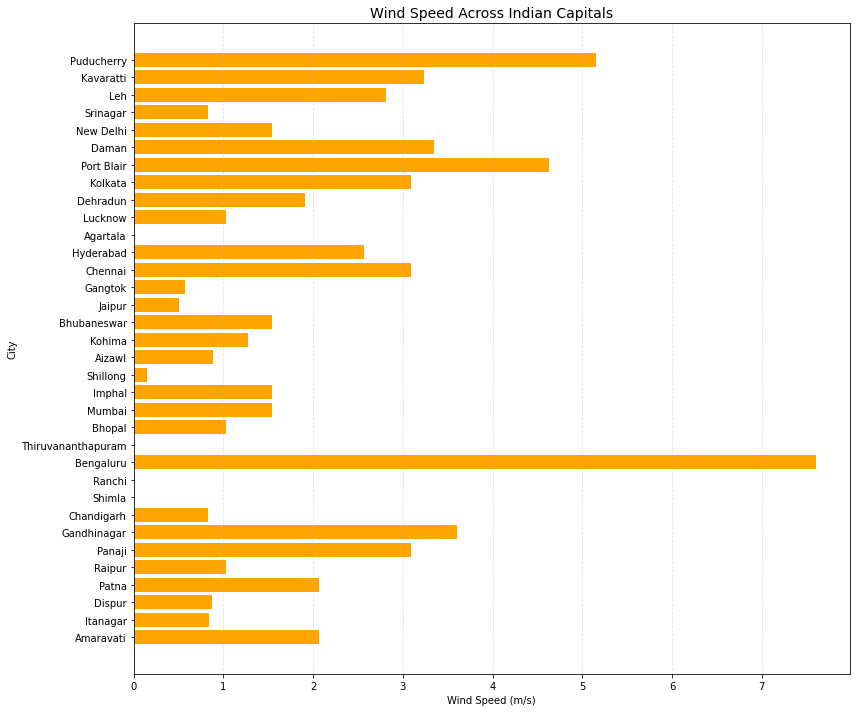

In [57]:
# Wind Speed Bar Chart
plt.figure(figsize=(12, 10))
plt.barh(df["city"], df["wind_speed"], color="orange")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("City")
plt.title("Wind Speed Across Indian Capitals", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

Weather Conditions Count

In [58]:
df["weather_description"].value_counts()

mist                13
clear sky           10
haze                 4
fog                  3
overcast clouds      3
scattered clouds     1
Name: weather_description, dtype: int64

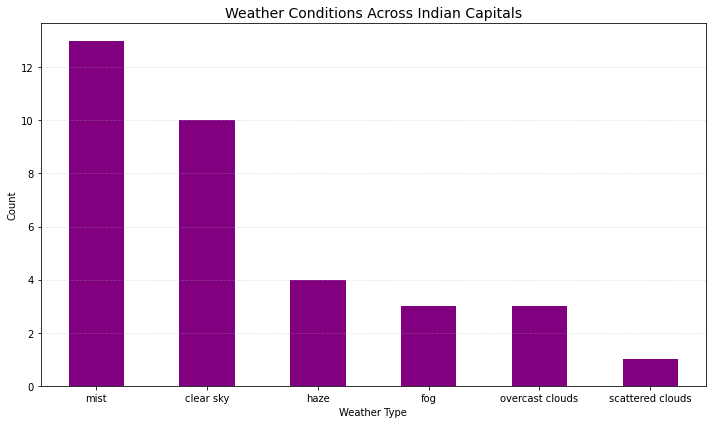

In [59]:
plt.figure(figsize=(10, 6))
df["weather_description"].value_counts().plot(kind="bar", color="purple")
plt.title("Weather Conditions Across Indian Capitals", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Weather Type")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

In [60]:
df[["temperature", "humidity", "wind_speed"]].corr()

,temperature,humidity,wind_speed
temperature,1.000000,0.477282,0.381635
humidity,0.477282,1.000000,0.115003
wind_speed,0.381635,0.115003,1.000000


The correlation matrix helps identify how temperature, humidity, and wind speed are related across different Indian capitals.

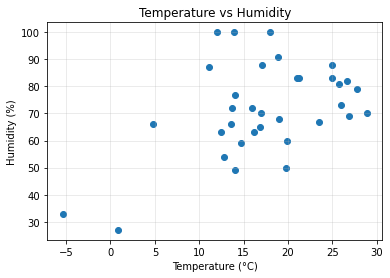

In [61]:
plt.scatter(df["temperature"], df["humidity"])
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Temperature vs Humidity")
plt.grid(alpha=0.3)
plt.show()

#### 🌡️ Temperature vs Humidity Scatter Plot

The scatter plot represents how humidity levels vary with temperature across all Indian state and union-territory capitals.  
There is no strong linear relationship between temperature and humidity, meaning hotter cities are not always more humid, and cooler cities do not always have lower humidity.  
The spread of points indicates that multiple climatic zones exist across India, each with different temperature–humidity behavior.


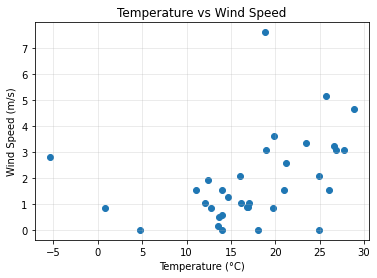

In [62]:
plt.scatter(df["temperature"], df["wind_speed"])
plt.xlabel("Temperature (°C)")
plt.ylabel("Wind Speed (m/s)")
plt.title("Temperature vs Wind Speed")
plt.grid(alpha=0.3)
plt.show()

#### 🌬️ Temperature vs Wind Speed

This scatter plot shows how wind speed varies with temperature across Indian capitals.  
There is no strong direct relationship; cities with similar temperatures can still have very different wind speeds.


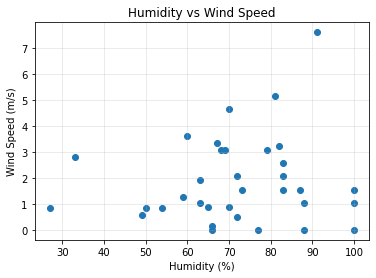

In [63]:
plt.scatter(df["humidity"], df["wind_speed"])
plt.xlabel("Humidity (%)")
plt.ylabel("Wind Speed (m/s)")
plt.title("Humidity vs Wind Speed")
plt.grid(alpha=0.3)
plt.show()


#### 💧 Humidity vs Wind Speed

This plot shows how atmospheric moisture relates to wind speed.  
The wide spread indicates that wind speed is not strongly dependent on humidity levels.


Temperature Distribution (Histogram)

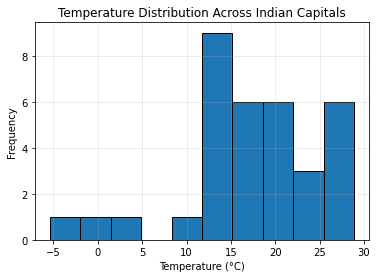

In [64]:
plt.hist(df["temperature"], bins=10, edgecolor="black")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Temperature Distribution Across Indian Capitals")
plt.grid(alpha=0.3)
plt.show()

#### 🌡️ Temperature Distribution

The histogram shows how temperatures are distributed across Indian capitals.  
Most cities fall within moderate temperature ranges, with few extremely hot or cold points.


Humidity Distribution (Histogram)

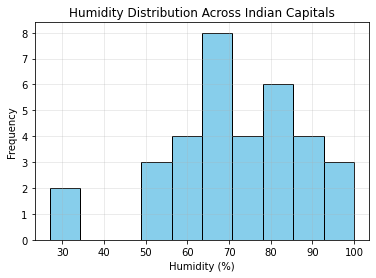

In [65]:
plt.hist(df["humidity"], bins=10, edgecolor="black", color='skyblue')
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.title("Humidity Distribution Across Indian Capitals")
plt.grid(alpha=0.3)
plt.show()

#### 💧 Humidity Distribution

This histogram visualizes how humidity values vary among the capitals.  
Many cities show higher humidity, indicating strong tropical or coastal influence.


Temperature Boxplot (Outlier Detection)

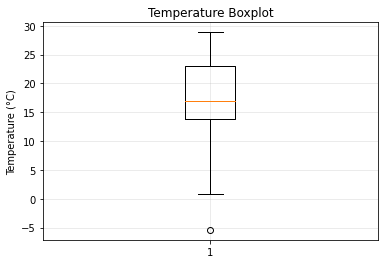

In [66]:
plt.boxplot(df["temperature"])
plt.ylabel("Temperature (°C)")
plt.title("Temperature Boxplot")
plt.grid(alpha=0.3)
plt.show()

#### 📦 Temperature Boxplot

The boxplot highlights temperature outliers among all cities.  
Any points outside the whiskers represent unusually hot or cold regions.


Humidity Boxplot

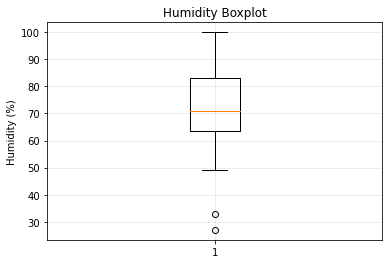

In [67]:
plt.boxplot(df["humidity"])
plt.ylabel("Humidity (%)")
plt.title("Humidity Boxplot")
plt.grid(alpha=0.3)
plt.show()


#### 📦 Humidity Boxplot

The humidity boxplot helps identify cities with extremely high or low humidity compared to the national average.


Correlation Heatmap (Seaborn version)

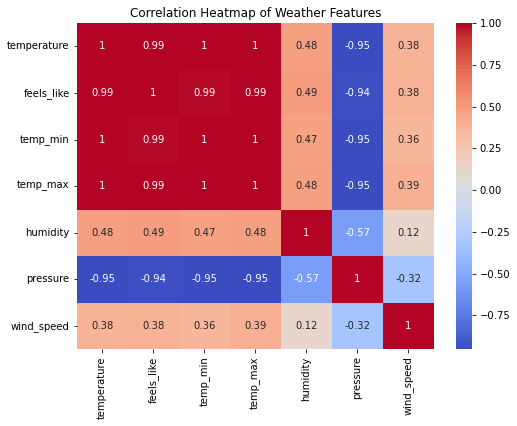

In [68]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(
    df[["temperature","feels_like","temp_min","temp_max","humidity","pressure","wind_speed"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap of Weather Features")
plt.show()
    #displays three key details:
    #The strongest positive correlation is between temperature and feels_like (0.99), indicating that as the temperature increases, the perceived temperature also rises significantly.
    #There is a moderate negative correlation between humidity and temperature (-0.45), suggesting that higher temperatures tend to be associated with lower humidity levels.



The correlation heatmap visually represents how different weather variables are related to each other across all Indian state and union-territory capitals.  
Each cell in the heatmap shows a correlation value between −1 and +1, where values close to +1 indicate a strong positive relationship, values close to −1 indicate a strong negative relationship, and values near 0 indicate weak or no relationship.

Temperature-based features such as temperature, feels-like, temp_min, and temp_max show a very strong positive correlation with each other.  
This indicates that when the actual temperature increases or decreases, the related temperature indicators follow a similar trend across all cities.

Humidity, on the other hand, does not strongly correlate with temperature features.  
This means hot cities are not necessarily more humid, and cooler cities are not always dry.  
Humidity levels depend more on local climate, coastal influence, and regional weather patterns.

Wind speed also shows weak correlations with both temperature and humidity.  
This suggests that wind conditions are influenced by geographical features such as elevation, coastal proximity, and regional atmospheric pressure differences.

The pressure variable shows low correlation with temperature and humidity, indicating that atmospheric pressure in Indian capitals varies independently of other weather parameters.

## Conclusion

The Exploratory Data Analysis of Indian capitals’ weather data reveals strong climatic diversity across the country.
Temperature-related variables show strong positive correlations, indicating consistent thermal behavior across cities, whereas humidity and wind speed behave independently, reflecting the influence of regional climate conditions such as coastal areas, plains, and hilly regions.

Heatmaps and distribution plots clearly highlight regions that experience extreme temperatures or humidity.
Outlier detection further identifies cities with unusual climatic patterns.
Overall, this study provides meaningful insights into national weather variations and establishes a solid base for future trend analysis, forecasting models, or climate-based decision making. 